In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("insurance.csv")
df.head()

In [ ]:
df.info()

In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

The code below tarnsforms the categorical values into numerical values

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df.sex = encoder.fit_transform(df.sex)

df.smoker = encoder.fit_transform(df.smoker)

region = pd.get_dummies(df['region'])
#     df = df.drop('region', axis=1)

df = pd.concat([df, region], axis=1)
df= df.loc[:,~df.columns.duplicated()]
df.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,0,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,0,1,0,0


In [5]:
df.to_csv(r'C:\Users\mjzeo\Downloads\asd.csv', index=False, header=True)

## Exploratory Data Analysis

In [6]:
print('The shape of the data is: ' + str(df.shape))

The shape of the data is: (1338, 11)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int32  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int32  
 5   region     1338 non-null   object 
 6   charges    1338 non-null   float64
 7   northeast  1338 non-null   uint8  
 8   northwest  1338 non-null   uint8  
 9   southeast  1338 non-null   uint8  
 10  southwest  1338 non-null   uint8  
dtypes: float64(2), int32(2), int64(2), object(1), uint8(4)
memory usage: 68.1+ KB


In [8]:
df.describe()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,0.242152,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428546,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


In [9]:
df.median(numeric_only=True)

age            39.000
sex             1.000
bmi            30.400
children        1.000
smoker          0.000
charges      9382.033
northeast       0.000
northwest       0.000
southeast       0.000
southwest       0.000
dtype: float64

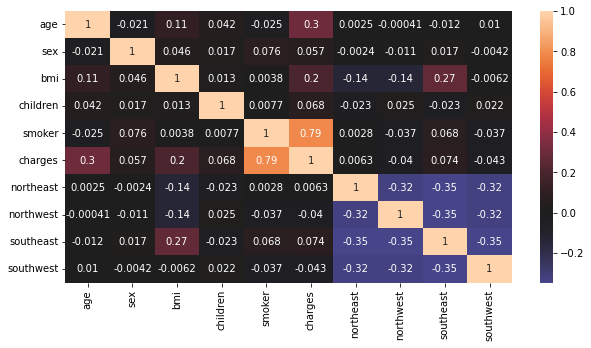

In [10]:
corr_data = df.corr()
fig = plt.figure(figsize = [10,5])
sns.heatmap(corr_data,annot = True, center = 0)
plt.show()

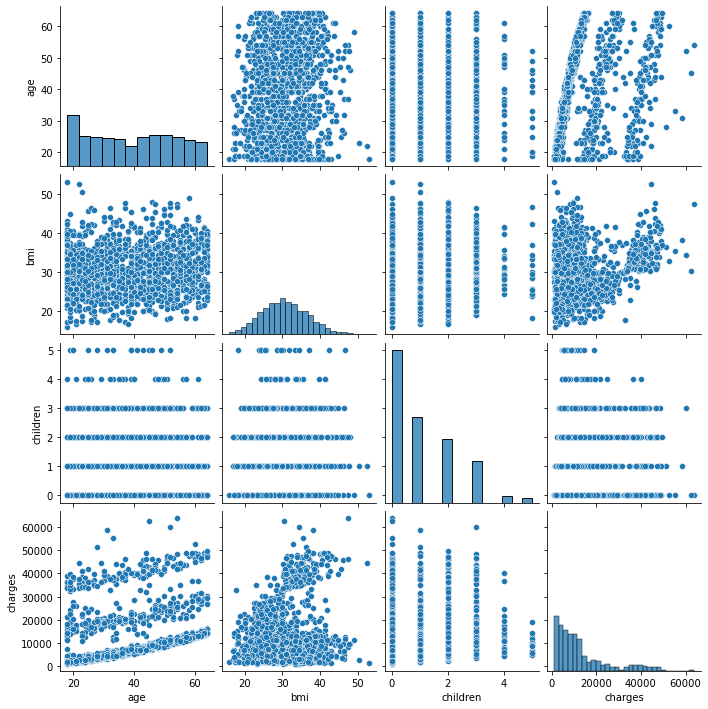

In [11]:
sns.pairplot(df, vars=["age", 'bmi','children','charges'])
plt.show()

Text(0.5, 1.0, 'Age Distribution')

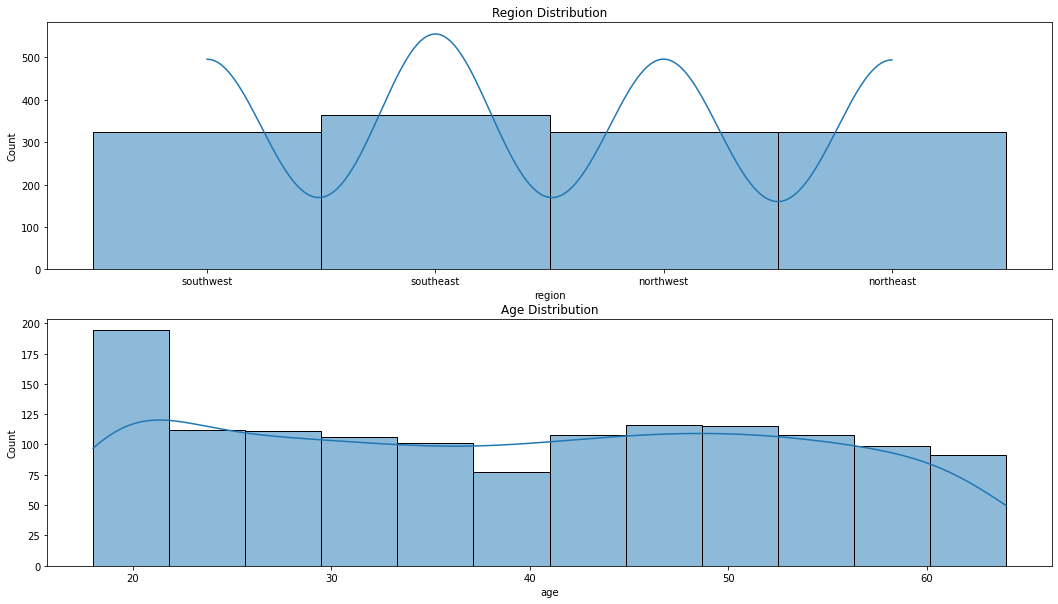

In [12]:
fig, axes = plt.subplots(2,1, figsize=(18, 10))
sns.histplot(df['region'], kde=True, ax=axes[0]) 
axes[0].set_title('Region Distribution')
sns.histplot(df['age'], kde=True, ax=axes[1]) 
axes[1].set_title('Age Distribution')

Text(0.5, 1.0, 'Sex vs Charges')

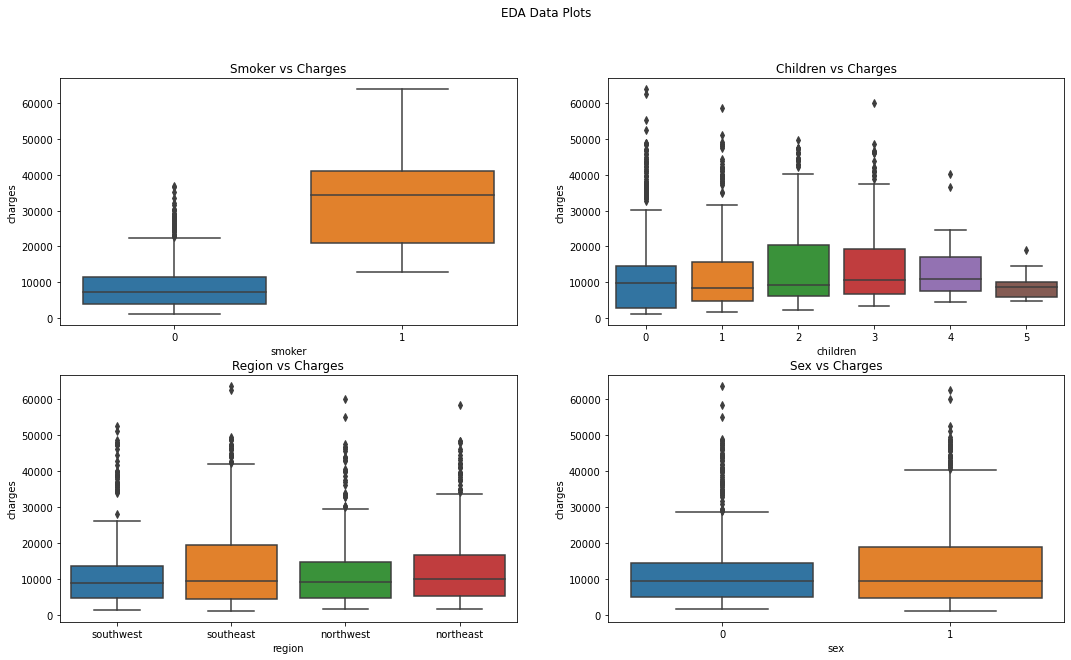

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('EDA Data Plots')

sns.boxplot(ax=axes[0, 0], data=df, x='smoker', y='charges')
axes[0,0].set_title('Smoker vs Charges')
sns.boxplot(ax=axes[0, 1], data=df, x='children', y='charges')
axes[0,1].set_title('Children vs Charges')
sns.boxplot(ax=axes[1, 0], data=df, x='region', y='charges')
axes[1,0].set_title('Region vs Charges')
sns.boxplot(ax=axes[1, 1], data=df, x='sex', y='charges')
axes[1,1].set_title('Sex vs Charges')

Text(0.5, 1.0, 'Smoker vs Charges')

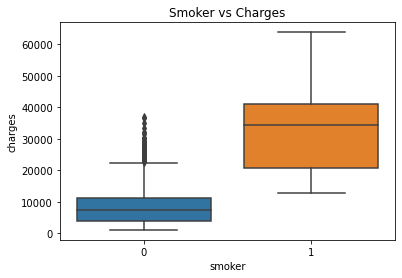

In [14]:
sns.boxplot(x = 'smoker', y = 'charges', data = df)
plt.title('Smoker vs Charges')

In [70]:
x = df.drop(['charges', 'region'], axis=1)
y = df['charges']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, train_size = 0.7, random_state = 1)

In [72]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

results = {}

basic_lin_reg = LinearRegression()
basic_lin_reg.fit(X_train, y_train)
rSqrted = basic_lin_reg.score(X_test, y_test)
print(basic_lin_reg.intercept_)
print(basic_lin_reg.coef_)
print(rSqrted)
adj_rSqrted = 1 - (1-rSqrted)*(len(y)-1)/(len(y)-X_train.shape[1]-1)
print(adj_rSqrted)
results['basic_lin_reg'] = [rSqrted, adj_rSqrted]


13276.698553898505
[3528.98273114 -141.35911014 1961.65520818  421.55016415 9733.78688309
  230.14079939   99.89180015 -176.86423097 -143.927575  ]
0.7405989316927211
0.738840942524976


In [ ]:
#Linear Regression Model on Smoker, BMI and Age

x_corr = df.drop(['charges', 'region', 'southeast', 'southwest','northeast', 'children', 'northwest'], axis=1)
y_corr = df['charges']
X_corr_train, X_corr_test, y_corr_train, y_corr_test = train_test_split(x_corr,y_corr, test_size = 0.3, train_size = 0.7, random_state = 1)
X_corr_train.head()
results = {}

scaler = StandardScaler()
X_corr_train = scaler.fit_transform(X_corr_train)
X_corr_test = scaler.transform(X_corr_test)

basic_corr_lin_reg = LinearRegression()
basic_corr_lin_reg.fit(X_corr_train, y_corr_train)
rSqrted_corr = basic_corr_lin_reg.score(X_corr_test, y_corr_test)
print(basic_corr_lin_reg.intercept_)
print(basic_corr_lin_reg.coef_)
print(rSqrted_corr)
adj_rSqrted_corr = 1 - (1-rSqrted_corr)*(len(y)-1)/(len(y)-X_corr_train.shape[1]-1)
print(adj_rSqrted_corr)
results['basic_corr_lin_reg'] = [rSqrted_corr, adj_rSqrted_corr]

In [97]:
from sklearn.linear_model import Ridge
basic_ridge_reg = Ridge()
basic_ridge_reg.fit(X_train, y_train)
rSqrted = basic_ridge_reg.score(X_test, y_test)
print(basic_ridge_reg.intercept_)
print(basic_ridge_reg.coef_)
print(rSqrted)
adj_rSqrted = 1 - (1-rSqrted)*(len(y)-1)/(len(y)-X_train.shape[1]-1)
print(adj_rSqrted)
results['basic_ridge_reg'] = [rSqrted, adj_rSqrted]

13276.698553898505
[3525.36268866 -140.42856602 1959.75453317  421.10911164 9723.27965954
  229.78840589   99.43309692 -176.09780566 -143.90979165]
0.7406122602486029
0.7388543614099263


In [98]:
from sklearn.linear_model import Lasso
basic_lasso_reg = Lasso()
basic_lasso_reg.fit(X_train, y_train)
rSqrted = basic_lasso_reg.score(X_test, y_test)
print(basic_lasso_reg.intercept_)
print(basic_lasso_reg.coef_)
print(rSqrted)
adj_rSqrted = 1 - (1-rSqrted)*(len(y)-1)/(len(y)-X_train.shape[1]-1)
print(adj_rSqrted)
results['basic_lasso_reg'] = [rSqrted, adj_rSqrted]

13276.698553898505
[3528.16547856 -140.19614087 1960.19776762  420.55455708 9732.67289884
  343.00588661  212.54828794  -58.27896311  -26.80302214]
0.7405876936974838
0.7388296283686264


In [99]:
from sklearn.preprocessing import PolynomialFeatures
poly_obj = PolynomialFeatures(degree=2)
poly_x = poly_obj.fit_transform(x)
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(poly_x,y, test_size = 0.3, train_size = 0.7, random_state = 1)
basic_poly_reg = LinearRegression()
basic_poly_reg.fit(X_poly_train, y_poly_train)

rSqrted = basic_poly_reg.score(X_poly_test, y_poly_test)
print(basic_poly_reg.intercept_)
print(basic_poly_reg.coef_)
print(rSqrted)
adj_rSqrted = 1 - (1-rSqrted)*(len(y)-1)/(len(y)-X_train.shape[1]-1)
print(adj_rSqrted)

results['basic_poly_reg'] = [rSqrted, adj_rSqrted]

-6449519344277.836
[ 6.44951934e+12 -7.14016997e+01 -7.80504592e+02  2.68074401e+02
  1.05283802e+03 -8.42625842e+03 -1.19673858e+02 -1.87488785e+02
  7.31959165e+02 -4.24796521e+02  3.72319161e+00  2.40387289e+01
  1.10225408e+00  5.59136576e+00 -7.07837118e+00 -4.42158606e+01
 -4.71217726e+01  1.58415090e+01  4.09442444e+00 -7.80504592e+02
  1.19891774e+01 -1.27373267e+02 -6.41266925e+02 -2.56154850e+02
 -6.38609247e+02  3.87030471e+02 -2.72770966e+02 -5.53442254e+00
 -1.53342847e+01  1.44548540e+03  1.32437948e+02  1.16394126e+02
 -3.21598642e+01  5.14021908e+01 -9.02340135e+01 -7.86240177e+02
  1.53914528e+02  6.57611599e+02  1.44659785e+02  9.66521034e+01
 -8.42625842e+03 -1.85395639e+03 -2.56888497e+03 -2.59896383e+03
 -1.40445324e+03 -1.19673858e+02  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.87488785e+02  0.00000000e+00  0.00000000e+00
  7.31959165e+02  0.00000000e+00 -4.24796521e+02]
0.8456199804922517
0.8445737303600456


In [103]:
from prettytable import PrettyTable

table = PrettyTable()

table.field_names = ['Model', 'R^2', 'Adj. R^2']
for key in results:
    table.add_row([key, str(format(results[key][0],'.5f')), str(format(results[key][1],'.5f'))])

print(table)

+-----------------+---------+----------+
|      Model      |   R^2   | Adj. R^2 |
+-----------------+---------+----------+
|  basic_lin_reg  | 0.74060 | 0.73884  |
| basic_ridge_reg | 0.74061 | 0.73885  |
| basic_lasso_reg | 0.74059 | 0.73883  |
|  basic_poly_reg | 0.84562 | 0.84457  |
+-----------------+---------+----------+


In [104]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


def generateNeuralNetwork():
    tf.random.set_seed(1)
    model = keras.Sequential([
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['mse'])
    return model

In [105]:
base_model = generateNeuralNetwork()
history = base_model.fit(x=X_train, y=y_train, batch_size = 128, epochs=150, verbose=0)
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2560      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 43,777
Trainable params: 43,777
Non-trainable params: 0
_________________________________________________________________


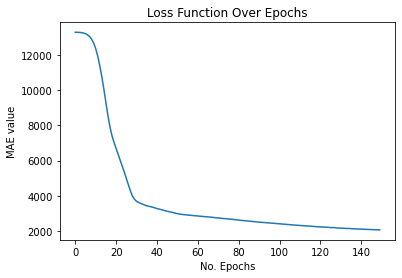

In [106]:
plt.plot(history.history['loss'])
plt.title('Loss Function Over Epochs')
plt.ylabel('MAE value')
plt.xlabel('No. Epochs')
plt.show()

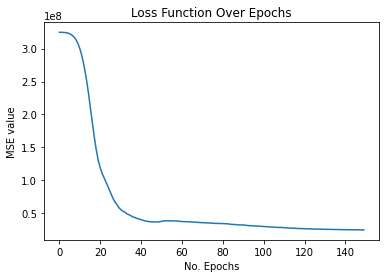

In [107]:
plt.plot(history.history['mse'])
plt.title('Loss Function Over Epochs')
plt.ylabel('MSE value')
plt.xlabel('No. Epochs')
plt.show()

In [108]:
predictions = base_model.predict(X_test)
for i, pred in enumerate(predictions):
    print("The actual is ", y_test.iloc[i], " and prediction is ", pred[0])

13/13 [==============================] - 0s 2ms/step
The actual is  1646.4297  and prediction is  1632.3843
The actual is  11353.2276  and prediction is  11432.879
The actual is  8798.593  and prediction is  8883.864
The actual is  10381.4787  and prediction is  10524.521
The actual is  2103.08  and prediction is  1885.4254
The actual is  38746.3551  and prediction is  32240.488
The actual is  9304.7019  and prediction is  9330.159
The actual is  11658.11505  and prediction is  11755.144
The actual is  3070.8087  and prediction is  3060.0317
The actual is  19539.243  and prediction is  25755.89
The actual is  12629.8967  and prediction is  12910.842
The actual is  11538.421  and prediction is  15484.577
The actual is  6338.0756  and prediction is  6603.3755
The actual is  7050.642  and prediction is  7078.207
The actual is  1137.4697  and prediction is  1185.3322
The actual is  8968.33  and prediction is  8999.616
The actual is  21984.47061  and prediction is  4052.5574
The actual is  

The actual is  6775.961  and prediction is  6828.2207
The actual is  4922.9159  and prediction is  5066.9795
The actual is  20773.62775  and prediction is  28139.035
The actual is  5266.3656  and prediction is  5228.2314
The actual is  4340.4409  and prediction is  4262.064
The actual is  1131.5066  and prediction is  1459.5052
The actual is  6640.54485  and prediction is  7002.1113
The actual is  4949.7587  and prediction is  4928.4146
The actual is  1769.53165  and prediction is  1769.4858
The actual is  15820.699  and prediction is  18126.355
The actual is  2480.9791  and prediction is  2571.3892
The actual is  4399.731  and prediction is  4749.7886
The actual is  13822.803  and prediction is  13927.671
The actual is  13204.28565  and prediction is  12922.362
The actual is  9290.1395  and prediction is  9400.491
The actual is  13880.949  and prediction is  13964.694
The actual is  11033.6617  and prediction is  11255.504
The actual is  9875.6804  and prediction is  10813.376
The act

In [109]:
results['basic_nn_model'] = base_model.evaluate(X_test, y_test, verbose=0)
print(results)

{'basic_lin_reg': [0.7405989316927211, 0.738840942524976], 'basic_ridge_reg': [0.7406122602486029, 0.7388543614099263], 'basic_lasso_reg': [0.7405876936974838, 0.7388296283686264], 'basic_poly_reg': [0.8456199804922517, 0.8445737303600456], 'basic_nn_model': [1995.990966796875, 23390686.0]}


In [112]:
nn_results = {}
for key in results:
    if("nn_model" in key): nn_results[key] = results[key]

pd.DataFrame(nn_results, index=['MAE Loss', 'MSE']).T

,MAE Loss,MSE
basic_nn_model,1995.990967,23390686.0


In [113]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

model = KerasRegressor(build_fn = generateNeuralNetwork)
params = {
    'batch_size': [16, 32, 64, 128],
    'epochs': [50, 100, 150]
}
grid = GridSearchCV(estimator= model, param_grid= params, scoring= 'neg_mean_absolute_error', cv=5)

grid = grid.fit(X_train, y_train, verbose = 0)

C:\Users\mjzeo\AppData\Local\Temp/ipykernel_10580/649897508.py:4: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = generateNeuralNetwork)


2/2 [==============================] - 0s 6ms/step


In [114]:
best_parameters = grid.best_params_
best_score = grid.best_score_

print("Best Parameters: " + str(best_parameters))


Best Parameters: {'batch_size': 16, 'epochs': 150}


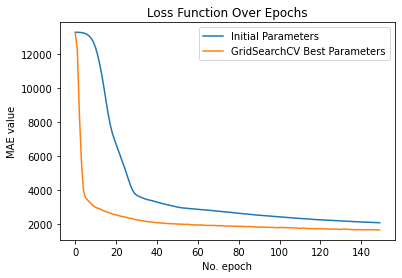

In [115]:
bestClassifier = generateNeuralNetwork()
HistoryBest = bestClassifier.fit(x = X_train, y = y_train, batch_size = best_parameters['batch_size'], 
                                                                                        epochs=best_parameters['epochs'] , verbose = 0)
plt.plot(history.history['loss'], label='Initial Parameters')
plt.plot(HistoryBest.history['loss'], label='GridSearchCV Best Parameters')
plt.title('Loss Function Over Epochs')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()


In [116]:
results['better_nn_model'] = bestClassifier.evaluate(x= X_train, y=y_train, verbose=0)

In [117]:
nn_results = {}
for key in results:
    if("nn_model" in key): nn_results[key] = results[key]

pd.DataFrame(nn_results, index=['MAE Loss', 'MSE']).T

,MAE Loss,MSE
basic_nn_model,1995.990967,23390686.0
better_nn_model,1626.036987,22178860.0
